<a href="https://colab.research.google.com/github/imeldp96/qsar_study/blob/main/Feature_engineering_and_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOAD DATA

In [ ]:
import io
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Statistical packages
import statsmodels.api as sm
from statsmodels.formula.api import ols   # ordinary least squares model
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
random = 30139

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/desc-set.csv', index_col=[0])
#data = pd.read_csv('/content/drive/MyDrive/data/pred_ml.csv', index_col=[0])
#QC = df.iloc[:, 0:26]
#MS = df.iloc[:, [0] + list(range(26, df.shape[1]))]
#columns_to_drop = ['Ethermal', 'Eelect', 'qC7', 'qR2', 'qR1', 'LUMO']  # Add the names of columns you want to drop
#df = df.drop(columns_to_drop, axis=1)

In [ ]:
print(data.head)

In [ ]:
X_vi_ms = data[['FNSA3 (Jurs Descriptors)', 'Chi (3): cluster (valence modified) (Fast Descriptors)', 'Molecular density (Spatial Descriptors)']] # Dropping the 'pIC50' column from X.
X_ga_ms = data[['Chi (3): cluster (Fast Descriptors)', 'Principal moment of inertia Y (Spatial Descriptors)', 'Shadow area: ZX plane (Spatial Descriptors)']]
X_vi_qc = data[['qN3', 'dEL-H', 'r(N3-C13)']]
X_ga_qc = data[['qC2', 'dEL-H']]

y = data['pIC50']  # Setting y as the target variable.
print(X_ga_qc.iloc[:5, :5])

           qC2  dEL-H
senyawa              
DH_7    -0.045  4.921
DH_8    -0.152  4.946
DH_9    -0.153  2.304
DH_10   -0.157  4.928
DH_12   -0.131  2.843


In [ ]:
X_train1 = X_vi_ms.iloc[:16]
X_test1 = X_vi_ms.iloc[16:20]

X_train2 = X_ga_ms.iloc[:16]
X_test2 = X_ga_ms.iloc[16:20]

X_traina = X_vi_qc.iloc[:16]
X_testa = X_vi_qc.iloc[16:20]

X_trainb = X_ga_qc.iloc[:16]
X_testb = X_ga_qc.iloc[16:20]

y_train = y.iloc[:16]
y_test = y.iloc[16:20]

# CORRELATION AND VIF

In [ ]:
df_cor = data.corr()

In [ ]:
train_top = df_cor.iloc[df_cor['pIC50'].abs().argsort()[::1]]

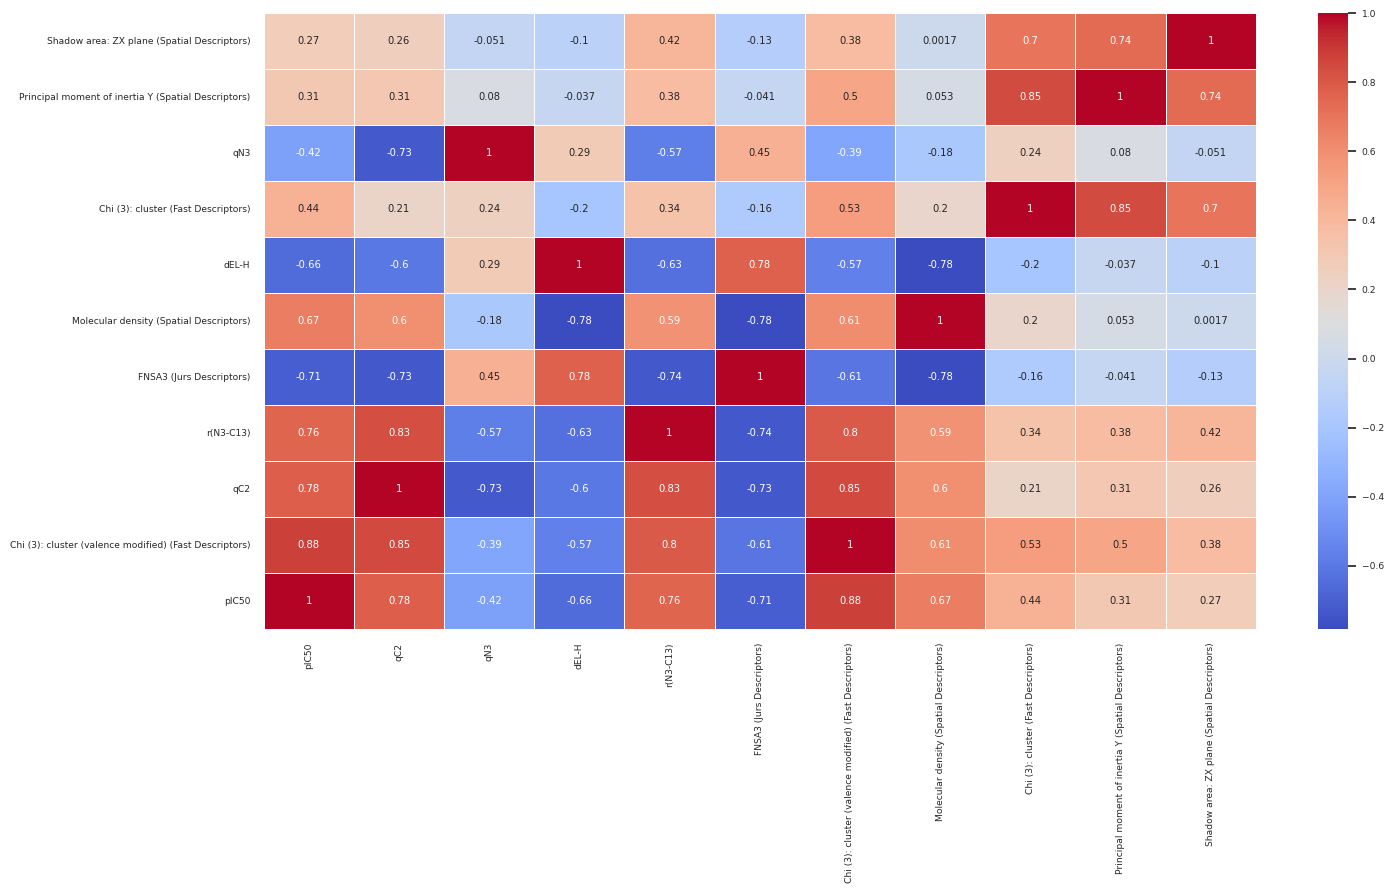

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a heatmap
sns.set(font_scale=0.6)  # Set the font size for labels
plt.figure(figsize=(16, 8))  # Adjust the figure size as needed

# Create the heatmap
sns.heatmap(train_top, cmap='coolwarm', annot=True, linewidths=0.5)

# Show the plot
plt.show()

In [ ]:
df_cor.to_csv('df_cor.csv')

In [ ]:
# Input all features
#columns_to_drop = ['qR1', 'qR2', 'qC7', 'r(C7-R2)', 'r(C10-R1)', 'LUMO', 'qC10', 'qC8', 'Ethermal', 'qC6', 'qC13', 'qC5']  # Add the names of columns you want to drop
#T = train.drop(columns_to_drop, axis=1)

#trained = train_qc[['qC2', 'Polarizability', 'r(N3-C13)', 'softness', 'Dipole moment (debye)', 'qN3', 'qC1', 'r(C13-R3)']]
#trained = train_qc[['qC2', 'qN3', 'r(N3-C13)']]

T = data.iloc[:,:]
T['intercept'] = 1

def calculate_vif(T):
    vif = pd.DataFrame()
    vif['index'] = T.columns
    vif['VIF'] = [variance_inflation_factor(T.values,i) for i in range(T.shape[1])]
    return vif

vif = calculate_vif(T.iloc[:,:])
while (vif['VIF'] > 10).any():
    remove = vif.sort_values(by='VIF',ascending=False)['index'][:1].values[0]
    T.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(T)

print(vif)
df_vif = pd.DataFrame(vif)

                      index       VIF
0                       qC2  1.816326
1  FNSA3 (Jurs Descriptors)  1.816326


In [ ]:
print(T)

# RF HYPERPARAMETER TUNING

In [ ]:
#loading the dataset
#import pandas library
import pandas as pd
import numpy as np
from pandas import DataFrame as df
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
#reading the dataset
from google.colab import drive

In [ ]:
# Instantiate random forest and train on new features
rf = RandomForestRegressor(random_state = random)
rf_base = rf.fit(X_train2, y_train)

In [ ]:
#prediction on the training dataset
ytrain_pred = rf_base.predict(X_train2)
#training model evaluation
#training r-sq
print('The training r_sq is: %.3f'% rf_base.score(X_train2, y_train))
#OOB training
#print('The OOB score is: %.3f'% rf_base.oob_score_)
#the MSE
print('The MSE is: %.3f'% mean_squared_error(y_train, ytrain_pred))
#RMSE
import numpy as np
print('The RMSE is: %.3f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))

The training r_sq is: 0.760
The MSE is: 0.317
The RMSE is: 0.563


In [ ]:
#prediction on the testing data
ytest_pred = rf_base.predict(X_test2)

#testing coef. of determination
print('The testing r_sq is: %.3f'% r2_score(y_test, ytest_pred))
#model evaluation metrics on test set

#the MSE
print('The MSE is: %.3f'% mean_squared_error(y_test, ytest_pred))

#RMSE
print('The RMSE is: %.3f'% np.sqrt(mean_squared_error(y_test, ytest_pred)))

The testing r_sq is: 0.482
The MSE is: 1.682
The RMSE is: 1.297


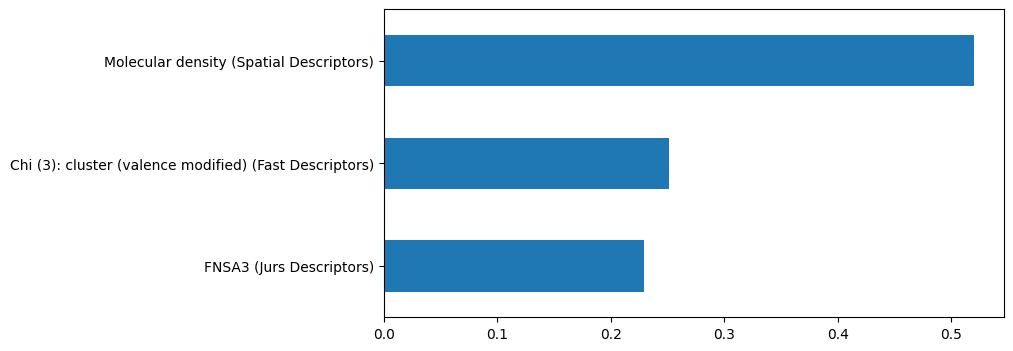

In [ ]:
from numpy.core.fromnumeric import size
model_ranks=pd.Series(rf_base.feature_importances_,index=X_train1.columns,name="Importance").sort_values(ascending=True,inplace=False)
ax=model_ranks.plot(kind='barh', fontsize = 10, figsize = (8,4))

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_base.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 30139,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 225, num = 225)]
# Number of features to consider at every split
max_features = [1, 2, 3]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 16, num =16)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, None],
 'max_features': [1, 2, 3],
 'min_samples_leaf': [1, 2, 3, 4],
 'min_samples_split': [2, 3, 4, 5],
 'n_estimators': [1,
                  2,
                  3,
                  4,
                  5,
                  6,
                  7,
                  8,
                  9,
                  10,
                  11,
                  12,
                  13,
                  14,
                  15,
                  16,
                  17,
                  18,
                  19,
                  20,
                  21,
                  22,
                  23,
                  24,
                  25,
                  26,
                  27,
                  28,
                  29,
                  30,
                  31,
                  32,
                  33,
                  34,
                  35,
                  36,
            

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1500, cv = 3, verbose=2, scoring=['r2', 'neg_root_mean_squared_error'], refit = 'r2' , random_state=random, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train2, y_train)

Fitting 3 folds for each of 1500 candidates, totalling 4500 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=1500,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, None],
                                        'max_features': [1, 2, 3],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   random_state=30139, refit='r2',
                   scoring=['r2', 'neg_root_mean_squared_error'], verbose=2)

In [ ]:
# Access the randomized hyperparameters and their values
random_params = rf_random.cv_results_

# Convert the randomized hyperparameters to a DataFrame
hyperparameters_rand_df = pd.DataFrame(random_params)

# Save the DataFrame to a CSV file
hyperparameters_rand_df.to_csv('random_hyperparameters.csv')

rf_random.best_params_

{'n_estimators': 7,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 2,
 'max_depth': 12,
 'bootstrap': True}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy
base_model = RandomForestRegressor(n_estimators = 100, random_state = random)
base_model.fit(X_train2, y_train)
base_accuracy = evaluate(base_model, X_test2, y_test)

Model Performance
Average Error: 0.9936.
Accuracy = 84.62%.


In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test2, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 1.3534.
Accuracy = 77.38%.
Improvement of -8.55%.


GridSearch CV

In [ ]:
from pandas.core.generic import RandomState
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'n_estimators': [50, 55, 60, 65, 70],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [1, 2, 3],
    'max_depth': [3, 5, 7, 10, 15],
    'bootstrap': [True, False],

}
# Create a based model
rf = RandomForestRegressor(random_state= random)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2, scoring=['r2', 'neg_root_mean_squared_error'], refit = 'r2')

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train1, y_train)
grid_search.best_params_

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits


{'bootstrap': False,
 'max_depth': 7,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 60}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy
base_model = RandomForestRegressor(n_estimators = 100, random_state = random)
base_model.fit(X_train1, y_train)
base_accuracy = evaluate(base_model, X_test1, y_test)

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test1, y_test)


print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))
results = grid_search.cv_results_

Model Performance
Average Error: 0.5260.
Accuracy = 92.63%.
Model Performance
Average Error: 0.4116.
Accuracy = 94.01%.
Improvement of 1.48%.


In [ ]:
# Access the randomized hyperparameters and their values
grids_params = grid_search.cv_results_

# Convert the randomized hyperparameters to a DataFrame
hyperparameters_df = pd.DataFrame(grids_params)

# Save the DataFrame to a CSV file
hyperparameters_df.to_csv('grids_hyperparameters.csv')

# RF BAYESIAN OPTIMIZATION

from: https://drlee.io/step-by-step-guide-bayesian-optimization-with-random-forest-fdc6f329db9c

In [ ]:
!pip install bayesian-optimization scikit-learn pandas

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

In [ ]:
def objective(n_estimators, max_depth, min_samples_split, max_features):
    model = RandomForestRegressor(n_estimators=int(n_estimators),
                                  max_depth=int(max_depth),
                                  min_samples_split=int(min_samples_split),
                                  max_features=min(max_features, 0.999),  # Fraction, must be <= 1.0
                                  random_state=random)

    return -1.0 * cross_val_score(model, X_train, y_train, cv=4, scoring="neg_mean_squared_error").mean()

In [ ]:
# Bounds for hyperparameters
param_bounds = {
    'n_estimators': (10, 250),
    'max_depth': (1, 15),
    'min_samples_split': (2, 15),
    'max_features': (0.1, 0.999),
}

optimizer = BayesianOptimization(f=objective, pbounds=param_bounds, random_state=random)
optimizer.maximize(init_points=5, n_iter=100)

|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 1.251     | 2.925     | 0.8763    | 3.848     | 223.2     |
| 2         | 1.852     | 6.491     | 0.9446    | 10.03     | 209.7     |
| 3         | 1.195     | 12.24     | 0.5216    | 4.65      | 48.6      |
| 4         | 1.853     | 6.857     | 0.3387    | 10.98     | 230.7     |
| 5         | 1.915     | 1.012     | 0.9615    | 11.6      | 136.2     |
| 6         | 1.953     | 10.04     | 0.6085    | 12.45     | 75.64     |
| 7         | 1.235     | 6.812     | 0.7088    | 6.612     | 219.6     |
| 8         | 1.513     | 10.29     | 0.2695    | 9.184     | 80.96     |
| 9         | 1.959     | 9.859     | 0.8533    | 14.81     | 71.83     |
| 10        | 1.81      | 15.0      | 0.999     | 10.02     | 70.62     |
| 11        | 1.552     | 3.987     | 0.999     | 9.993     | 70.9      |
| 12        | 1.953     | 15.0      | 

In [ ]:
best_params = optimizer.max['params']

In [ ]:
best_params_formatted = {
    'n_estimators': int(best_params['n_estimators']),
    'max_depth': int(best_params['max_depth']),
    'min_samples_split': int(best_params['min_samples_split']),
    'max_features': best_params['max_features']
}

In [ ]:
optimized_rf = RandomForestRegressor(**best_params_formatted, random_state=random)
optimized_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=1, max_features=0.6470628908881765,
                      min_samples_split=14, n_estimators=14,
                      random_state=30139)

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy
base_model = RandomForestRegressor(n_estimators = 100, random_state = random)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)
bayesian_accuracy = evaluate(optimized_rf, X_test, y_test)


print('Improvement of {:0.2f}%.'.format( 100 * (bayesian_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.5279.
Accuracy = 92.57%.
Model Performance
Average Error: 1.3621.
Accuracy = 80.12%.
Improvement of -13.45%.


In [ ]:
optimized_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 1,
 'max_features': 0.6470628908881765,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 14,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 14,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 30139,
 'verbose': 0,
 'warm_start': False}

#SVR HYPERPARAMETERS TUNING

In [ ]:
#loading the dataset
#import pandas library
import pandas as pd
import numpy as np
from pandas import DataFrame as df
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn import svm

In [ ]:
# Instantiate svr on all feature
svr = svm.SVR(C=2)
svr_base = svr.fit(X_train2, y_train)

In [ ]:
#prediction on the training dataset
ytrain_pred = svr_base.predict(X_train2)
#training model evaluation
#training r-sq
print('The training r_sq is: %.3f'% svr_base.score(X_train2, y_train))
#the MSE
print('The MSE is: %.3f'% mean_squared_error(y_train, ytrain_pred))
#RMSE
print('The RMSE is: %.3f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))

The training r_sq is: -0.063
The MSE is: 1.406
The RMSE is: 1.186


In [ ]:
#prediction on the testing data
ytest_pred = svr_base.predict(X_test2)

#testing coef. of determination
print('The testing r_sq is: %.3f'% r2_score(y_test, ytest_pred))
#model evaluation metrics on test set
#the MSE
print('The MSE is: %.3f'% mean_squared_error(y_test, ytest_pred))
#RMSE
print('The RMSE is: %.3f'% np.sqrt(mean_squared_error(y_test, ytest_pred)))


The testing r_sq is: -0.092
The MSE is: 3.542
The RMSE is: 1.882


In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(svr_base.get_params())

Parameters currently in use:

{'C': 2,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


Text(0.5, 0, 'Permutation Importance')

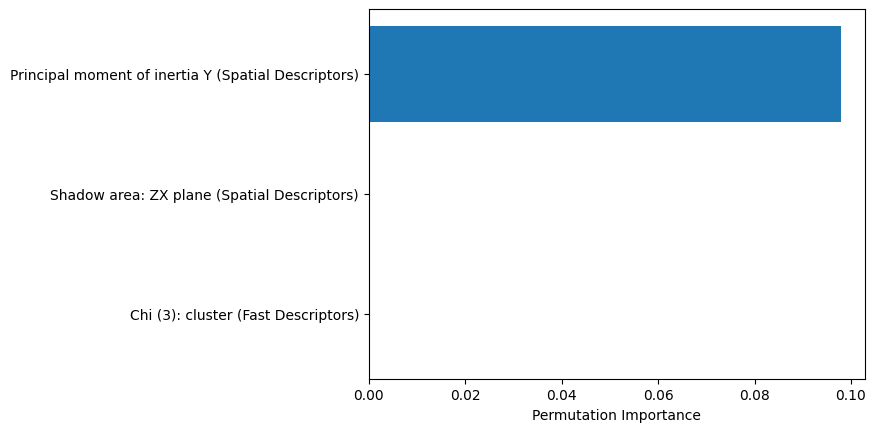

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

perm_importance = permutation_importance(svr, X_train2, y_train)

feature_names = X_train2.columns
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

***RandomizedSearchCV***

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# kernel
kernel = ['linear', 'rbf']
# C
C = [int(x) for x in np.logspace(-4, 2, num = 7)]
# epsilon
epsilon = [float(x) for x in np.logspace(-4, 1, num = 6)]
#gamma
gamma = [float(x) for x in np.logspace(-4, 2, num=7)]
# Create the random grid
random_grid = {'kernel': kernel,
               'C': C,
               'epsilon': epsilon,
               'gamma': gamma}
pprint(random_grid)

{'C': [0, 0, 0, 0, 1, 10, 100],
 'epsilon': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
 'kernel': ['linear', 'rbf']}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
svr = svm.SVR()
# Random search of parameters, using 4 fold cross validation,
# search across 1500 different combinations, and use all available cores
svr_random = RandomizedSearchCV(estimator = svr, param_distributions = random_grid, n_iter = 1500, cv = 3, verbose=2, scoring=['r2', 'neg_root_mean_squared_error'], refit = 'r2', n_jobs = -1)
# Fit the random search model
svr_random.fit(X_train2, y_train)

Fitting 3 folds for each of 588 candidates, totalling 1764 fits


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=1500, n_jobs=-1,
                   param_distributions={'C': [0, 0, 0, 0, 1, 10, 100],
                                        'epsilon': [0.0001, 0.001, 0.01, 0.1,
                                                    1.0, 10.0],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0,
                                                  10.0, 100.0],
                                        'kernel': ['linear', 'rbf']},
                   refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
                   verbose=2)

In [ ]:
# Access the randomized hyperparameters and their values
random_params = svr_random.cv_results_

# Convert the randomized hyperparameters to a DataFrame
hyperparameters_rand_df = pd.DataFrame(random_params)

# Save the DataFrame to a CSV file
hyperparameters_rand_df.to_csv('random_hyperparameters.csv')

svr_random.best_params_

{'kernel': 'rbf', 'gamma': 1.0, 'epsilon': 0.0001, 'C': 1}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy
base_model = svm.SVR(C=2)
base_model.fit(X_train2, y_train)
base_accuracy = evaluate(base_model, X_test2, y_test)

Model Performance
Average Error: 1.2213.
Accuracy = 83.50%.


In [ ]:
best_random = svr_random.best_estimator_
random_accuracy = evaluate(best_random, X_test2, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 1.2895.
Accuracy = 81.98%.
Improvement of -1.82%.


***GridSearchCV***

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
# param_grid = {'kernel': ['rbf'],
               #'C': [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100],
               #'epsilon': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}
param_grid = [
               {'C': [1, 2, 3, 4, 5, 10, 50, 100, 150, 175, 200], 'kernel': ['linear'], 'epsilon': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 'scale']},
               {'C': [1, 2, 3, 4, 5, 10, 50, 100, 150, 175, 200], 'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 'scale'], 'kernel': ['rbf'], 'epsilon': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]}
                ]
# Create a based model
svr = svm.SVR()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = svr, param_grid = param_grid,
                          cv = None, n_jobs = -1, verbose = 2, scoring=['r2', 'neg_mean_squared_error'], refit = 'neg_mean_squared_error')

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train2, y_train)
grid_search.best_params_

Fitting 5 folds for each of 803 candidates, totalling 4015 fits


{'C': 1, 'epsilon': 0.001, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy
base_model = svm.SVR(C=2)
base_model.fit(X_train2, y_train)
base_accuracy = evaluate(base_model, X_test2, y_test)

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test2, y_test)


print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))
results = grid_search.cv_results_

Model Performance
Average Error: 1.2213.
Accuracy = 83.50%.
Model Performance
Average Error: 1.1499.
Accuracy = 85.20%.
Improvement of 2.04%.


In [ ]:
# Access the randomized hyperparameters and their values
grids_params = grid_search.cv_results_

# Convert the randomized hyperparameters to a DataFrame
hyperparameters_df = pd.DataFrame(grids_params)

# Save the DataFrame to a CSV file
hyperparameters_df.to_csv('grids_hyperparameters.csv')

#XGBOOST GRIDSEARCH-CV TUNING

In [ ]:
# Importing core libraries
import numpy as np
import pandas as pd
from time import time
import pprint
import joblib
from functools import partial

# Suppressing warnings because of skopt verbosity
import warnings
warnings.filterwarnings("ignore")

# Classifier/Regressor
import xgboost
from xgboost import XGBRegressor

# Model selection
from sklearn.model_selection import KFold, StratifiedKFold

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
# param_grid = {'kernel': ['rbf'],
               #'C': [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100],
               #'epsilon': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}
param_grid = {'colsample_bytree':[0.7],
    'learning_rate': [0.4],
    'max_depth': [40],
    'min_child_weight':[3],
    'subsample':[0.4],
    'reg_alpha':[0.6],
    'reg_lambda': [0.1],
    'n_estimators': [80],
    'gamma' : [0.4]
              }
# Create a based model
xgb = XGBRegressor(booster='gbtree', objective='reg:squarederror', verbosity=2, seed=random, tree_method='auto')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2, scoring=['r2', 'neg_mean_squared_error'], refit = 'neg_mean_squared_error')

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train2, y_train)
grid_search.best_params_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


{'colsample_bytree': 0.7,
 'gamma': 0.4,
 'learning_rate': 0.4,
 'max_depth': 40,
 'min_child_weight': 3,
 'n_estimators': 80,
 'reg_alpha': 0.6,
 'reg_lambda': 0.1,
 'subsample': 0.4}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy
base_model = XGBRegressor(booster='gbtree', device='gpu', objective='reg:squarederror', verbosity=2, num_boosting_rounds=100)
base_model.fit(X_train2, y_train)
base_accuracy = evaluate(base_model, X_test2, y_test)

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test2, y_test)


print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))
results = grid_search.cv_results_

Model Performance
Average Error: 1.2801.
Accuracy = 82.40%.
Model Performance
Average Error: 0.9358.
Accuracy = 87.10%.
Improvement of 5.70%.


In [ ]:
best_grid.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.7,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.4,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 4,
 'max_leaves': None,
 'min_child_weight': 0,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 10,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': 'auto',
 'validate_parameters': None,
 'verbosity': 2,
 'seed': 30139}

In [ ]:
# Access the randomized hyperparameters and their values
grids_params = grid_search.cv_results_

# Convert the randomized hyperparameters to a DataFrame
hyperparameters_df = pd.DataFrame(grids_params)

# Save the DataFrame to a CSV file
hyperparameters_df.to_csv('grids_hyperparameters.csv')

NameError: name 'grid_search' is not defined

#XGBOOST BAYESIAN OPTIMIZATION

In [ ]:
!pip install bayesian-optimization scikit-learn pandas

In [ ]:
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

In [ ]:
def objective(colsample_bytree, learning_rate, max_depth, min_child_weight, subsample, reg_alpha, reg_lambda, n_estimators, gamma):
    model = XGBRegressor(booster='gbtree', objective='reg:squarederror', verbosity=2, tree_method = 'auto',
                         colsample_bytree = float(colsample_bytree),
                         learning_rate=float(learning_rate) ,
                         max_depth=int(max_depth),
                         min_child_weight=float(min_child_weight),
                         subsample= float(subsample),
                         reg_alpha=float(reg_alpha),
                         reg_lambda=float(reg_lambda),
                         n_estimators=int(n_estimators),
                         gamma=float(gamma))

    return -1.0 * cross_val_score(model, X_train2, y_train, cv=3, scoring="neg_mean_squared_error").mean()

In [ ]:
# Bounds for hyperparameters
param_bounds = {
    'colsample_bytree':(0.5, 1.0),
    'learning_rate': (0.0001, 1.0),
    'max_depth': (1,50),
    'min_child_weight':(0,100),
    'subsample':(0.5, 1.0),
    'reg_alpha':(0, 10),
    'reg_lambda': (0, 10),
    'n_estimators': (5,100),
    'gamma' : (0, 10)
     }

optimizer = BayesianOptimization(f=objective, pbounds=param_bounds, random_state=random)
optimizer.maximize(init_points=5, n_iter=1000)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
| 1         | 1.78      | 0.5687    | 8.636     | 0.1422    | 44.52     | 39.22     | 94.25     | 6.176     | 8.322     | 0.9014    |
| 2         | 1.78      | 0.7345    | 2.039     | 0.1609    | 21.5      | 26.55     | 70.63     | 9.194     | 0.008288  | 0.9792    |
| 3         | 1.78      | 0.8691    | 5.258     | 0.9026    | 4.426     | 16.99     | 60.8      | 7.401     | 5.057     | 0.7625    |
| 4         | 1.78      | 0.8809    | 7.761     | 0.03145   | 33.05     | 64.65     | 13.52     | 1.281     | 4.983     | 0.5952    |
| 5         | 1.78      | 0.9365    | 9.299     | 0.744     | 40.01     | 67.16     | 24.22     | 6.641     | 3.329     | 0.5096    |
| 6         | 1.78      | 0.8645    | 1.176     | 0.7192    | 

In [ ]:
best_params = optimizer.max['params']

In [ ]:
print(best_params)

{'colsample_bytree': 0.863075932557523, 'gamma': 0.02028717778047806, 'learning_rate': 0.5544660070790586, 'max_depth': 48.38614748228336, 'min_child_weight': 2.7540288996320994, 'n_estimators': 69.2328134672334, 'reg_alpha': 0.24206907421395862, 'reg_lambda': 8.276135654588547, 'subsample': 0.669123288757751}


In [ ]:
# Convert specific values to integers
# Round specific values and convert to integers
best_params['max_depth'] = int(round(best_params['max_depth']))
best_params['n_estimators'] = int(round(best_params['n_estimators']))
best_params['min_child_weight'] = int(round(best_params['min_child_weight']))

# Round other values to 2 decimal places
best_params['colsample_bytree'] = round(best_params['colsample_bytree'], 2)
best_params['learning_rate'] = round(best_params['learning_rate'], 2)
best_params['reg_alpha'] = round(best_params['reg_alpha'], 2)
best_params['reg_lambda'] = round(best_params['reg_lambda'], 2)
best_params['subsample'] = round(best_params['subsample'], 2)
best_params['gamma'] = round(best_params['gamma'], 2)


In [ ]:
print(best_params)

{'colsample_bytree': 0.86, 'gamma': 0.02, 'learning_rate': 0.55, 'max_depth': 48, 'min_child_weight': 3, 'n_estimators': 69, 'reg_alpha': 0.24, 'reg_lambda': 8.28, 'subsample': 0.67}


In [ ]:
optimized_xgb = XGBRegressor(**best_params, random_state=random, booster='gbtree', objective='reg:squarederror', verbosity=2, tree_method='auto') #fitting the best hyperparams
optimized_xgb.fit(X_train2, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.86, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.02, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.55, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=48, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=69, n_jobs=None,
             num_parallel_tree=None, random_state=30139, ...)

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy
base_model = XGBRegressor(booster='gbtree', objective='reg:squarederror', verbosity=2, tree_method='auto')
base_model.fit(X_train2, y_train)
base_accuracy = evaluate(base_model, X_test2, y_test)
bayesian_accuracy = evaluate(optimized_xgb, X_test2, y_test)


print('Improvement of {:0.2f}%.'.format( 100 * (bayesian_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 1.2801.
Accuracy = 82.40%.
Model Performance
Average Error: 1.3049.
Accuracy = 79.07%.
Improvement of -4.04%.


#LINEAR REGRESSION HP TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
# Create the parameter grid based on the results of random search
param_grid = [{'alpha' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 50, 100],
              'l1_ratio':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
                ]
# Create a based model
lr = linear_model.ElasticNet()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lr, param_grid = param_grid,
                          cv = 4, n_jobs = -1, verbose = 2, scoring=['r2', 'neg_mean_squared_error'], refit = 'neg_mean_squared_error')

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy
base_model = linear_model.LinearRegression()
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)


print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))
results = grid_search.cv_results_

In [ ]:
#prediction on the training dataset
ytrain_pred = base_model.predict(X_train)
#training model evaluation
#training r-sq
print('The training r_sq is: %.3f'% base_model.score(X_train, y_train))
#OOB training
#print('The OOB score is: %.3f'% rf_base.oob_score_)
#RMSE
print('The RMSE is: %.3f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))

In [ ]:
#prediction on the testing data
ytest_pred = base_model.predict(X_test)

#testing coef. of determination
print('The testing r_sq is: %.3f'% r2_score(y_test, ytest_pred))
#model evaluation metrics on test set
#RMSE
print('The RMSE is: %.3f'% np.sqrt(mean_squared_error(y_test, ytest_pred)))